<a href="https://colab.research.google.com/github/ASLManasa/MY_Ml/blob/master/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [98]:
data = pd.read_csv('/content/dataset.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,Yes,1,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,0,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,No,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,NaN,NaN,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,Yes,1,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,0,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,No,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,NaN,NaN,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [100]:
data.shape

(999, 13)

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            610 non-null    object 
 3   Dependents         598 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 101.6+ KB


In [102]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [103]:
data.describe

<bound method NDFrame.describe of       Loan_ID Gender Married  ... Credit_History Property_Area Loan_Status
0    LP001002   Male     Yes  ...            1.0         Urban           Y
1    LP001003   Male     Yes  ...            1.0         Rural           N
2    LP001005   Male     Yes  ...            1.0         Urban           Y
3    LP001006   Male      No  ...            1.0         Urban           Y
4    LP001008   Male     NaN  ...            1.0         Urban           Y
..        ...    ...     ...  ...            ...           ...         ...
994       NaN    NaN     NaN  ...            NaN           NaN         NaN
995       NaN    NaN     NaN  ...            NaN           NaN         NaN
996       NaN    NaN     NaN  ...            NaN           NaN         NaN
997       NaN    NaN     NaN  ...            NaN           NaN         NaN
998       NaN    NaN     NaN  ...            NaN           NaN         NaN

[999 rows x 13 columns]>

In [104]:
data.isnull().sum()

Loan_ID              385
Gender               398
Married              389
Dependents           401
Education            385
Self_Employed        417
ApplicantIncome      385
CoapplicantIncome    385
LoanAmount           407
Loan_Amount_Term     399
Credit_History       435
Property_Area        385
Loan_Status          385
dtype: int64

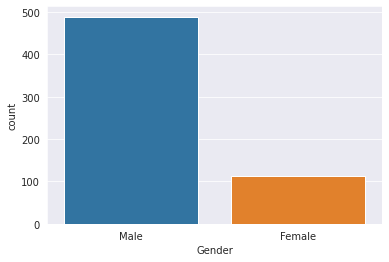

In [105]:
sns.set_style('darkgrid')
sns.countplot(x='Gender',data=data)

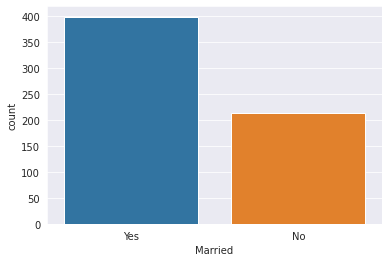

In [106]:
sns.countplot(x='Married',data=data)

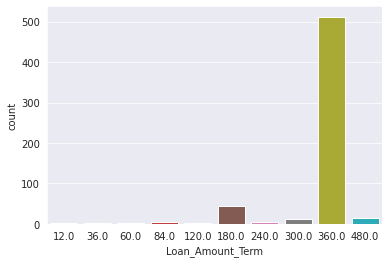

In [107]:
sns.countplot(x='Loan_Amount_Term',data=data)

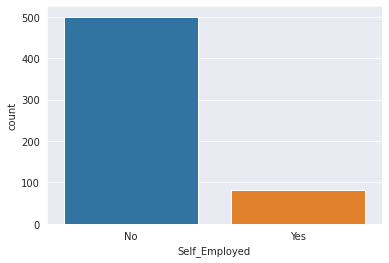

In [108]:
sns.countplot(x='Self_Employed',data=data)

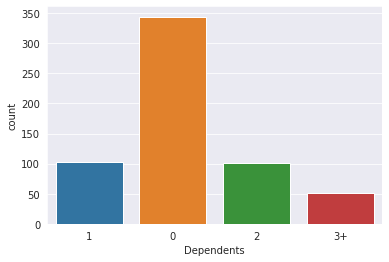

In [109]:
sns.countplot(x='Dependents',data=data)

In [110]:
data.drop(['Gender','Education','Property_Area'],axis =1)

,Loan_ID,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,LP001002,Yes,1,No,5849.0,0.0,NaN,360.0,1.0,Y
1,LP001003,Yes,0,No,4583.0,1508.0,128.0,360.0,1.0,N
2,LP001005,Yes,0,Yes,3000.0,0.0,66.0,360.0,1.0,Y
3,LP001006,No,0,No,2583.0,2358.0,120.0,360.0,1.0,Y
4,LP001008,NaN,NaN,No,6000.0,0.0,141.0,360.0,1.0,Y
...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
data.isnull().sum()

Loan_ID              385
Gender               398
Married              389
Dependents           401
Education            385
Self_Employed        417
ApplicantIncome      385
CoapplicantIncome    385
LoanAmount           407
Loan_Amount_Term     399
Credit_History       435
Property_Area        385
Loan_Status          385
dtype: int64

In [112]:
data.Loan_ID = data.Loan_ID.fillna(data['Loan_ID'].mode()[0])
data.Gender = data.Gender.fillna(data['Gender'].mode()[0])
data.Married = data.Married.fillna(data['Married'].mode()[0])
data.Dependents = data.Dependents.fillna(data['Dependents'].mode()[0])
data.Self_Employed = data.Self_Employed.fillna(data['Self_Employed'].mode()[0])
data.ApplicantIncome = data.ApplicantIncome.fillna(data['ApplicantIncome'].mode()[0])
data.CoapplicantIncome = data.CoapplicantIncome.fillna(data['CoapplicantIncome'].mode()[0])
data.LoanAmount  = data.LoanAmount .fillna(data['LoanAmount'].mode()[0])
data.Loan_Amount_Term = data.Loan_Amount_Term.fillna(data['Loan_Amount_Term'].mode()[0])
data.Credit_History  = data.Credit_History .fillna(data['Credit_History'].mode()[0])
data.Property_Area   = data.Property_Area .fillna(data['Property_Area'].mode()[0])
data.Loan_Status   = data.Loan_Status  .fillna(data['Loan_Status'].mode()[0])

Is there any other way to remove null values?


In [113]:
data.loc[data.Loan_Status=='N','Loan_Status']= 0
data.loc[data.Loan_Status=='Y','Loan_Status']=1

In [114]:
data.loc[data.Gender=='Male','Gender']= 0
data.loc[data.Gender=='Female','Gender']=1
data.loc[data.Married=='No','Married']= 0
data.loc[data.Married=='Yes','Married']=1
data.loc[data.Education=='Graduate','Education']= 0
data.loc[data.Education=='Not Graduate','Education']=1
data.loc[data.Self_Employed=='No','Self_Employed']= 0
data.loc[data.Self_Employed=='Yes','Self_Employed']=1

In [115]:
"""property_area= pd.get_dummies(data['Property_Area'],drop_first=True)
data= pd.concat([data,property_area],axis=1)
data.head()"""

"property_area= pd.get_dummies(data['Property_Area'],drop_first=True)\ndata= pd.concat([data,property_area],axis=1)\ndata.head()"

In [116]:
data.head

<bound method NDFrame.head of       Loan_ID Gender Married  ... Credit_History Property_Area Loan_Status
0    LP001002      0       1  ...            1.0         Urban           1
1    LP001003      0       1  ...            1.0         Rural           0
2    LP001005      0       1  ...            1.0         Urban           1
3    LP001006      0       0  ...            1.0         Urban           1
4    LP001008      0       1  ...            1.0         Urban           1
..        ...    ...     ...  ...            ...           ...         ...
994  LP001002      0       1  ...            1.0     Semiurban           1
995  LP001002      0       1  ...            1.0     Semiurban           1
996  LP001002      0       1  ...            1.0     Semiurban           1
997  LP001002      0       1  ...            1.0     Semiurban           1
998  LP001002      0       1  ...            1.0     Semiurban           1

[999 rows x 13 columns]>

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X= data.drop(['Loan_ID','Property_Area','Loan_Status','Gender','Education','Married'],axis=1)
y = data['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


In [119]:
X.columns

Index(['Dependents', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [120]:
from sklearn.linear_model import LogisticRegression


In [121]:
logmodel = LogisticRegression()


In [125]:
logmodel.fit(X_train,y_train)

ValueError: ignored

In [ ]:
prediction= logmodel.predict(X_test)